In [1]:
# All the necessary imports. Can be installed using pip install <package> or conda install <package>.
# Additional setup information available on their respective documentation sites.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Read file
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Print dimensions for verification
dim = df.shape
print(dim)

(41188, 21)


In [4]:
# Change all categories to numeric values
le = LabelEncoder()
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

for c in categories:
    le.fit(df[c])
    df[c] = le.transform(df[c])

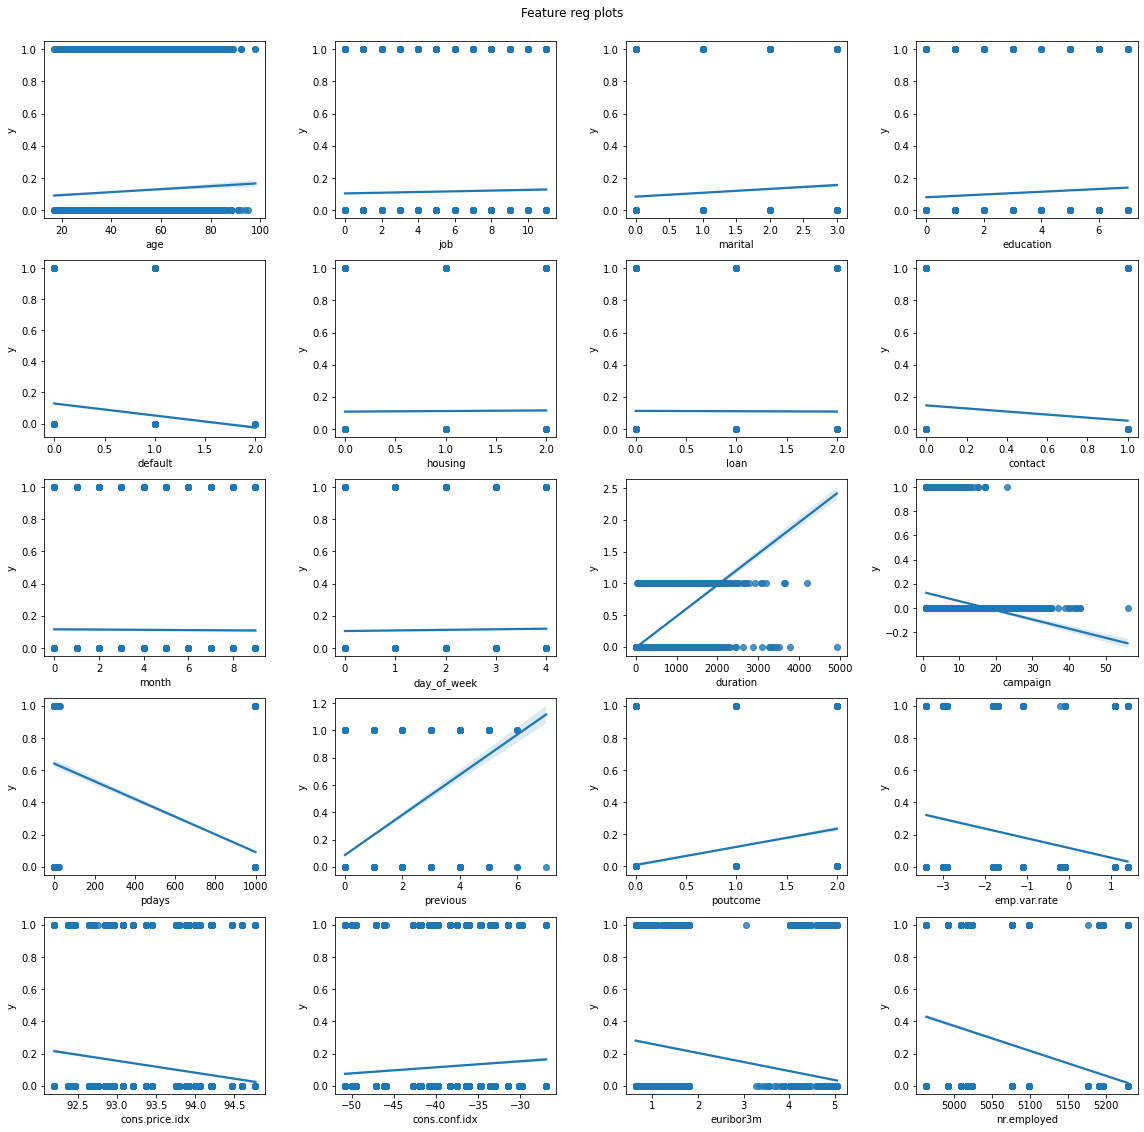

In [5]:
# Show reg plots of all features. feature on x axis and y/n on y axis
# Note: It takes a little bit of time to generate the plots so don't worry about it being stuck
fig, ax = plt.subplots(5, 4, figsize=(16,16))
for i, col in enumerate(df.columns[:-1]):
    j = i // 4
    sns.regplot(x=df[col], y=df["y"], ax=ax[j,i-(j*4)])

fig.suptitle('Feature reg plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

In [6]:
# Drop values which do not have any notable impact on the y value
df = df.drop(columns=["housing", "loan", "month", "day_of_week"])
df.head()

,age,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [7]:
# Split features and values
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
# Split data into train and test sets
# Use seed for reproducability
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [9]:
# Number of neurons to stay below. This is to avoid overfitting
# Alpha constant set to 5 here
n_in = 20
n_out = 1
n_samp = 0.8*dim[0]
a = 5
print(n_samp/(a*(n_in+n_out)))

313.81333333333333


In [10]:
# The data is assumed to be linearly separable. This implies that a single hidden layer is sufficient
model = Sequential()
model.add(Dense(16, input_dim=16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [11]:
# Compile and fit the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1030/1030 [==============================] - 1s 788us/step - loss: 7.9561 - accuracy: 0.8626
Epoch 2/100
1030/1030 [==============================] - 1s 764us/step - loss: 0.3787 - accuracy: 0.8935
Epoch 3/100
1030/1030 [==============================] - 1s 814us/step - loss: 0.3527 - accuracy: 0.8920
Epoch 4/100
1030/1030 [==============================] - 1s 765us/step - loss: 0.3578 - accuracy: 0.8921
Epoch 5/100
1030/1030 [==============================] - 1s 800us/step - loss: 0.3524 - accuracy: 0.8915
Epoch 6/100
1030/1030 [==============================] - 1s 772us/step - loss: 0.3331 - accuracy: 0.8969
Epoch 7/100
1030/1030 [==============================] - 1s 769us/step - loss: 0.3482 - accuracy: 0.8934
Epoch 8/100
1030/1030 [==============================] - 1s 788us/step - loss: 0.3312 - accuracy: 0.89470s - loss: 0.3413 
Epoch 9/100
1030/1030 [==============================] - 1s 818us/step - loss: 0.3217 - accuracy: 0.89620s - loss: 0.3231 - accuracy: 0.89
Epo

1030/1030 [==============================] - 1s 779us/step - loss: 0.2800 - accuracy: 0.89820s - loss: 0.2806 - 
Epoch 75/100
1030/1030 [==============================] - 1s 800us/step - loss: 0.2811 - accuracy: 0.8995
Epoch 76/100
1030/1030 [==============================] - 1s 785us/step - loss: 0.2847 - accuracy: 0.8966
Epoch 77/100
1030/1030 [==============================] - 1s 781us/step - loss: 0.2877 - accuracy: 0.8985
Epoch 78/100
1030/1030 [==============================] - 1s 794us/step - loss: 0.2762 - accuracy: 0.89830s - loss: 0.277
Epoch 79/100
1030/1030 [==============================] - 1s 807us/step - loss: 0.2688 - accuracy: 0.89790s - l
Epoch 80/100
1030/1030 [==============================] - 1s 807us/step - loss: 0.2948 - accuracy: 0.8953
Epoch 81/100
1030/1030 [==============================] - 1s 810us/step - loss: 0.2759 - accuracy: 0.8964
Epoch 82/100
1030/1030 [==============================] - 1s 785us/step - loss: 0.2725 - accuracy: 0.89680s - loss:
Epoch 8

In [12]:
# Save model to file for reproduction of results
#model.save("model1.model")

In [13]:
# Load model file
pred_model = load_model('model1.model')
print(pred_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Make predictions with 0.5 as the threshold for yes or no
y_pred = pred_model.predict(x_test) > 0.5

In [15]:
# Create a confusion matrix and print True Negative, False Positive, False Negative, True Positives
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(tn)
print(fp)
print(fn)
print(tp)

6782
521
296
639


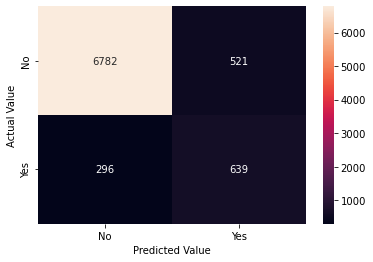

In [16]:
# Visualize the confusion matrix
labels = ["No", "Yes"]
ax = sns.heatmap(cm, annot=True, fmt="", xticklabels=labels, yticklabels=labels)

ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Value")
plt.show()

0.900825443068706


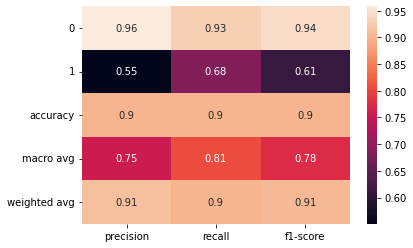

In [17]:
# Output accuracy score and a classification report
print(accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.show()

In [18]:
# Model 2 is same as the first model except size differs so a model can be created without including the duration feature
model2 = Sequential()
model2.add(Dense(15, input_dim=15, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

In [19]:
# Drop duration and split data same as before
df = df.drop(columns=["duration"])
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [20]:
# Print new dimensions
print(df.shape)

(41188, 16)


In [21]:
# Compile and fit the second model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
1030/1030 [==============================] - 1s 858us/step - loss: 7.0493 - accuracy: 0.8201
Epoch 2/100
1030/1030 [==============================] - 1s 802us/step - loss: 0.7160 - accuracy: 0.8454
Epoch 3/100
1030/1030 [==============================] - 1s 799us/step - loss: 0.5777 - accuracy: 0.8539
Epoch 4/100
1030/1030 [==============================] - 1s 783us/step - loss: 0.6718 - accuracy: 0.8487
Epoch 5/100
1030/1030 [==============================] - 1s 817us/step - loss: 0.5843 - accuracy: 0.8570
Epoch 6/100
1030/1030 [==============================] - 1s 794us/step - loss: 0.6152 - accuracy: 0.8514
Epoch 7/100
1030/1030 [==============================] - 1s 786us/step - loss: 0.6017 - accuracy: 0.8586
Epoch 8/100
1030/1030 [==============================] - 1s 782us/step - loss: 0.6330 - accuracy: 0.8567
Epoch 9/100
1030/1030 [==============================] - 1s 790us/step - loss: 0.6073 - accuracy: 0.8560
Epoch 10/100
1030/1030 [==============================]

1030/1030 [==============================] - 1s 806us/step - loss: 0.5243 - accuracy: 0.8655
Epoch 77/100
1030/1030 [==============================] - 1s 820us/step - loss: 0.5061 - accuracy: 0.8693
Epoch 78/100
1030/1030 [==============================] - 1s 784us/step - loss: 0.5103 - accuracy: 0.8691
Epoch 79/100
1030/1030 [==============================] - 1s 776us/step - loss: 0.5824 - accuracy: 0.8591
Epoch 80/100
1030/1030 [==============================] - 1s 810us/step - loss: 0.4608 - accuracy: 0.8701
Epoch 81/100
1030/1030 [==============================] - 1s 814us/step - loss: 0.5524 - accuracy: 0.8635
Epoch 82/100
1030/1030 [==============================] - 1s 790us/step - loss: 0.5580 - accuracy: 0.8625
Epoch 83/100
1030/1030 [==============================] - 1s 769us/step - loss: 0.5563 - accuracy: 0.8641
Epoch 84/100
1030/1030 [==============================] - 1s 773us/step - loss: 0.4931 - accuracy: 0.8690
Epoch 85/100
1030/1030 [==============================] - 1

In [22]:
# Save model to file for reproduction of results
#model2.save("model2.model")

In [23]:
# Load model file
pred_model2 = load_model('model2.model')
print(pred_model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# Predict with 0.5 as threshold
y_pred = pred_model2.predict(x_test) > 0.5

In [25]:
# Create a confusion matrix and print True Negative, False Positive, False Negative, True Positives
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(tn)
print(fp)
print(fn)
print(tp)

7254
49
804
131


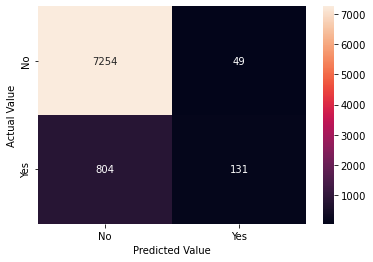

In [26]:
# Visualize the confusion matrix
labels = ["No", "Yes"]
ax = sns.heatmap(cm, annot=True, fmt="", xticklabels=labels, yticklabels=labels)

ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Value")
plt.show()

0.8964554503520272


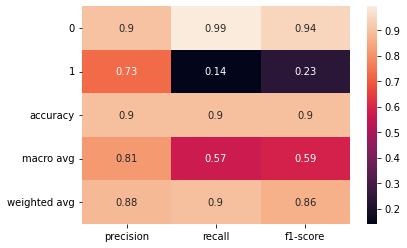

In [27]:
# Output accuracy score and a classification report
print(accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.show()